In [ ]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install hdbscan

In [1]:
import pip
pip install --upgrade git+https://github.com/scikit-learn-contrib/hdbscan.git#egg=hdbscan

SyntaxError: invalid syntax (<ipython-input-1-3bec8d809d30>, line 2)

HDBSCAN: proposed by Campello, Moulavi, and Sander

Where to find more info:

* https://github.com/lmcinnes/hdbscan
    
* https://hdbscan.readthedocs.io/en/latest/

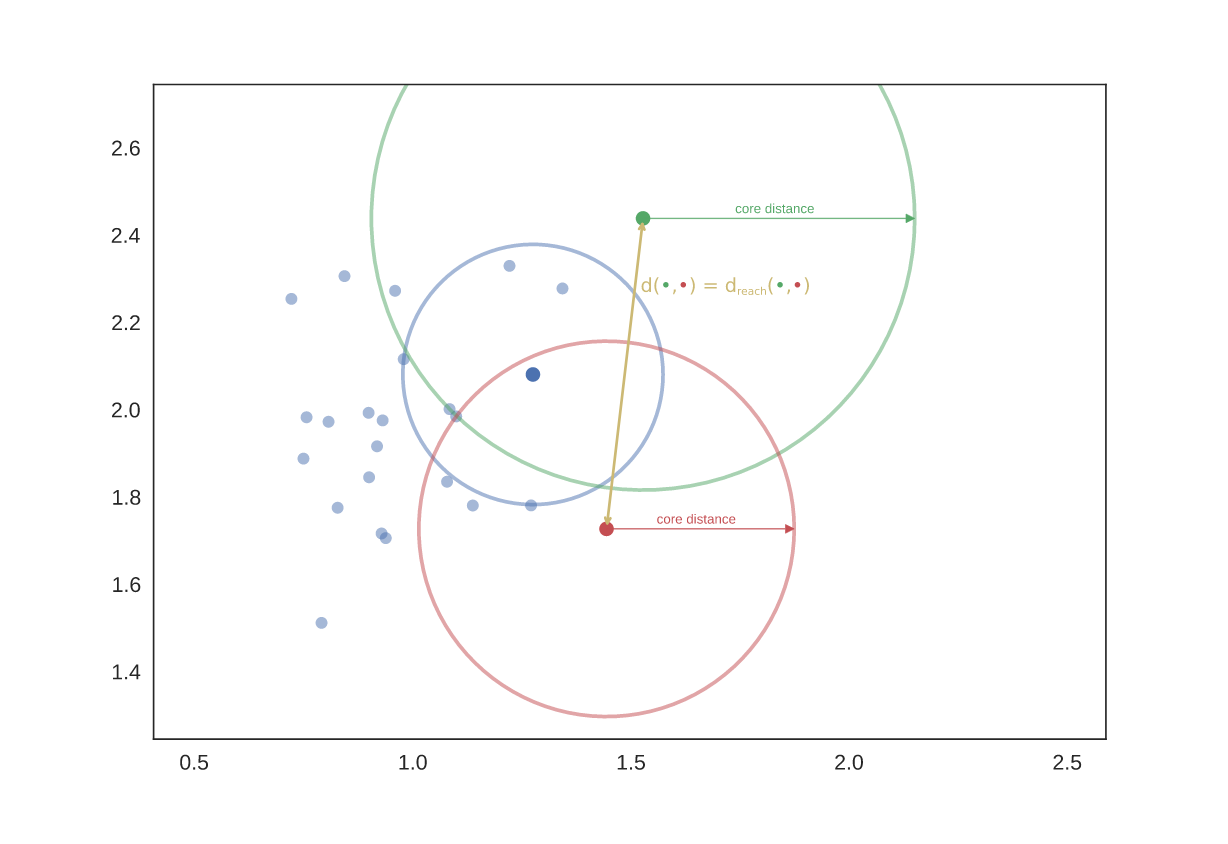

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hdbscan
import seaborn as sns

In [ ]:
HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
    gen_min_span_tree=False, leaf_size=40, memory=Memory(cachedir=None),
    metric='euclidean', min_cluster_size=5, min_samples=None, p=None)

Some metrics are cityblock, mahalanobis, manhattan, minkowski

## Example 1

In [2]:
from sklearn.datasets import make_blobs

blobs, labels = make_blobs(n_samples=2000,centers=4, n_features=10)

In [3]:
blobs.shape

(2000, 10)

In [4]:
pd.DataFrame(blobs).head()

,0,1,2,3,4,5,6,7,8,9
0,4.447339,8.974083,-8.614310,4.383976,-4.630340,-4.727297,8.803924,-3.006278,2.363246,-6.227722
1,1.825659,1.016613,9.070230,-1.572337,-3.083446,1.842256,7.344776,-2.732164,8.625200,-1.621236
2,0.419119,1.405956,7.643730,-2.698613,-3.370670,0.649825,6.864088,-4.230582,7.640926,-5.134893
3,5.324517,8.583163,-8.573209,5.773100,-4.548532,-4.386379,8.576914,-2.653540,3.325742,-5.007737
4,-1.746103,6.267926,6.315363,5.640844,0.579440,-6.156543,-5.398797,0.108617,-6.103708,-4.637998


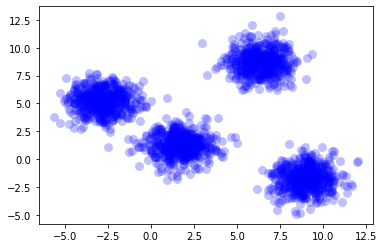

In [5]:
%matplotlib inline
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

plt.scatter(blobs[:,0], blobs[:,1], c='b', **plot_kwds)

In [184]:
clusterer = hdbscan.HDBSCAN( gen_min_span_tree=True )

clusterer.fit(blobs)

HDBSCAN(gen_min_span_tree=True)

In [7]:
clusterer.labels_

array([1, 3, 3, ..., 1, 0, 1], dtype=int64)

In [8]:
pd.crosstab( clusterer.labels_, columns='count')

col_0,count
row_0,
0,500
1,500
2,500
3,500


In [9]:
clusterer.probabilities_

array([0.91121574, 0.89076   , 0.76261016, ..., 0.61838261, 0.92609236,
       0.85640483])

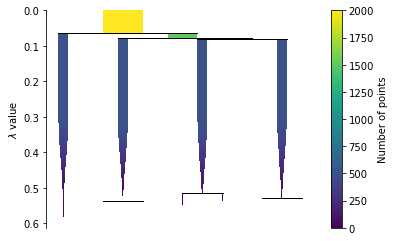

In [10]:
clusterer.condensed_tree_.plot()

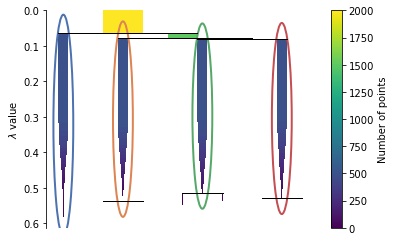

In [11]:
clusterer.condensed_tree_.plot(select_clusters=True,
                               selection_palette=sns.color_palette('deep', 8))

### Graphs for the results

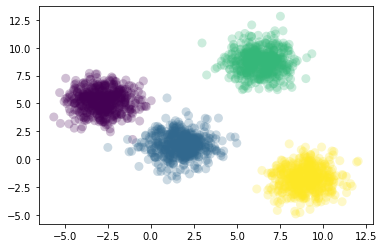

In [13]:
%matplotlib inline
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

plt.scatter(blobs[:,0], blobs[:,1], c=clusterer.labels_, **plot_kwds)

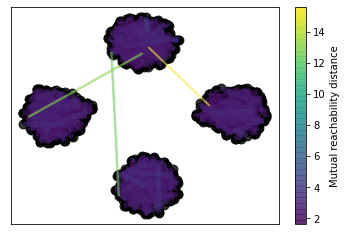

In [185]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)

#### Identically, we could run hdbscan without a vector space (knowing distance not vectors)

In [12]:
from sklearn.metrics.pairwise import pairwise_distances

distance_matrix = pairwise_distances(blobs)

clusterer = hdbscan.HDBSCAN(metric='precomputed')

clusterer.fit(distance_matrix)
clusterer.labels_

array([2, 1, 1, ..., 2, 0, 2], dtype=int64)

# Outliers and modifying  number of points

## Example 2

In [191]:
myclouds = pd.read_csv('D:/DOCUMENTOS RAUL/Canal Yout/stats with R/probardbscan.csv', header=None)

In [192]:
myclouds.columns= ["X","Y"]

In [194]:
myclouds.head()

,X,Y
0,123.534709,24.620591
1,100.669090,41.991731
2,68.125200,107.342126
3,165.968554,127.544542
4,169.349034,127.937700


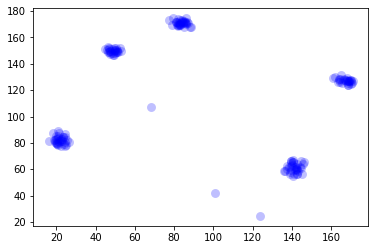

In [195]:
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

plt.scatter( myclouds["X"] , myclouds["Y"], c='b', **plot_kwds)

In [199]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=15)
clusterer.fit(myclouds)

HDBSCAN(min_cluster_size=15)

In [200]:
pd.crosstab(clusterer.labels_, columns='count')

col_0,count
row_0,
-1,1
0,28
1,37
2,35
3,28
4,35


### Results in one graph

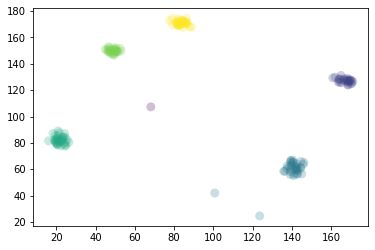

In [19]:
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

plt.scatter(myclouds["X"], myclouds["Y"], c=clusterer.labels_, **plot_kwds)

## Example 3

In [201]:
from sklearn import datasets
from sklearn.manifold import TSNE

digits = datasets.load_digits()

data = digits.data

data.shape

(1797, 64)

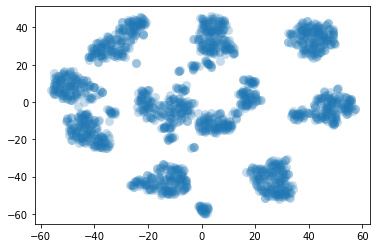

In [202]:
projection = TSNE().fit_transform(data)

plt.scatter(*projection.T, **plot_kwds)

In [205]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=15)   #  min_cluster_size??
clusterer.fit(projection)

HDBSCAN(min_cluster_size=15)

In [206]:
pd.crosstab(clusterer.labels_, columns='count')

col_0,count
row_0,
-1,23
0,182
1,178
2,178
3,181
4,27
5,166
6,195
7,369


### Results

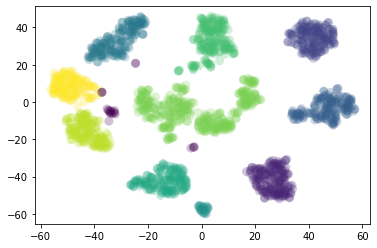

In [207]:
%matplotlib inline
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

plt.scatter(projection[:,0], projection[:,1], c=clusterer.labels_, **plot_kwds)

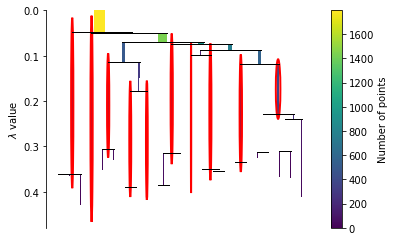

In [208]:
clusterer.condensed_tree_.plot(select_clusters=True,
                               selection_palette=sns.color_palette('deep', 8))

### EXAMPLE: DEFINITIVE PROOF

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hdbscan
import seaborn as sns

In [33]:
data = np.load('D:/DOCUMENTOS RAUL/Canal Yout/Stats with Python/clusterable_data.npy') 

# from HDBSCAN creators
#  https://github.com/lmcinnes/hdbscan/blob/master/notebooks/clusterable_data.npy

data.shape

(2309, 2)

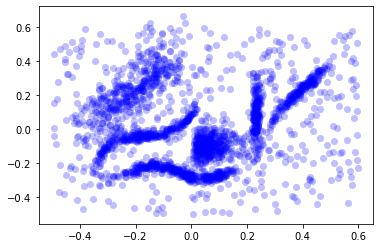

In [34]:
plt.scatter(*data.T, s=50, linewidth=0, c='b', alpha=0.25)

In [45]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=15, gen_min_span_tree=True, prediction_data=True)
clusterer.fit(data)

HDBSCAN(gen_min_span_tree=True, min_cluster_size=15, prediction_data=True)

####  How many clusters HDBSCAN found in data?

In [46]:
pd.crosstab(clusterer.labels_, columns='count')

col_0,count
row_0,
-1,548
0,200
1,275
2,316
3,208
4,356
5,406


### Plotting results and compare

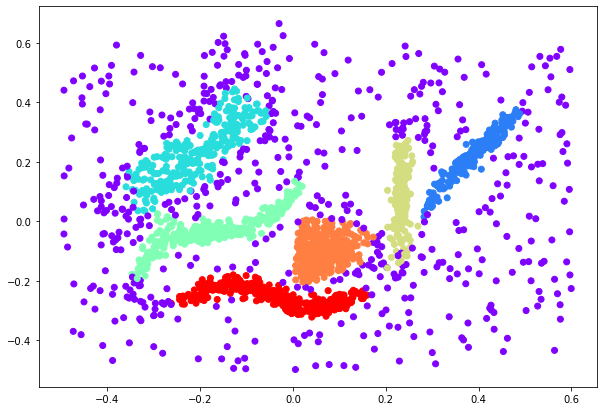

In [47]:
plt.figure(figsize=(10, 7))

plt.scatter(data[:,0], data[:,1], c=clusterer.labels_, cmap='rainbow')

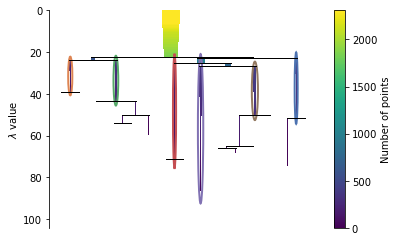

In [11]:
clusterer.condensed_tree_.plot(select_clusters=True,
                               selection_palette=sns.color_palette('deep', 8))

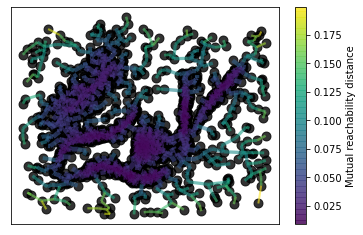

In [12]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)

## Cluster for New points ??

* prediction_data=True

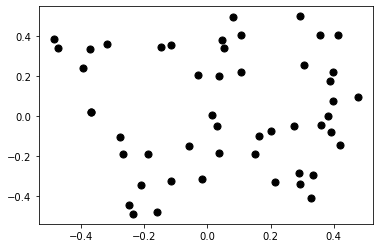

In [43]:
test_points = np.random.random(size=(50, 2)) - 0.5

plt.scatter(*test_points.T, c='k', s=50)

In [48]:
test_labels, strengths = hdbscan.approximate_predict(clusterer, test_points)
test_labels

array([ 0,  5, -1, -1, -1, -1, -1, -1,  2, -1, -1, -1, -1, -1, -1, -1,  4,
       -1, -1, -1, -1, -1,  1, -1, -1,  5,  1,  0, -1, -1, -1, -1, -1, -1,
       -1,  4, -1, -1, -1, -1, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1])

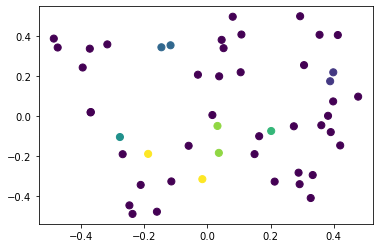

In [49]:
plt.scatter(*test_points.T, c=test_labels, s=50)

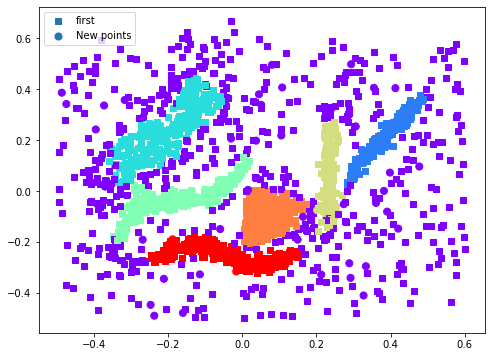

In [50]:
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)

ax1.scatter(data[:,0], data[:,1], c=clusterer.labels_, cmap='rainbow', marker="s", label='first')
ax1.scatter(*test_points.T, c=test_labels, s=50,  cmap='rainbow', marker="o", label='New points')
plt.legend(loc='upper left');
plt.show()


### Aplications

In [49]:
myletter = pd.read_csv('D:/DOCUMENTOS RAUL/UPR/Tesis/letterrecognition.csv', sep=';')
myletter.head(n=10)

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
5,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
6,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
7,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
8,J,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7
9,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8


In [102]:
myletter.shape

(20000, 17)

In [69]:
# create a group using groupby  # count the observations
# myletter.groupby("lettr").count()

myletter['lettr'].value_counts()

U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: lettr, dtype: int64

In [129]:
letter_dict = {chr(i+64):i for i in range(1,27)} # dictionary for upper case letter

In [131]:
colores = [ letter_dict.get(x) for x in myletter.lettr]  ## mapping for colores

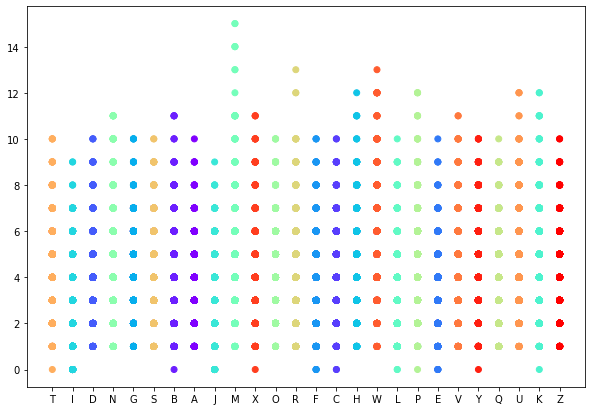

In [135]:
plt.figure(figsize=(10, 7))

plt.scatter(myletter.iloc[:,0], myletter.iloc[:,1], cmap='rainbow', c= colores )

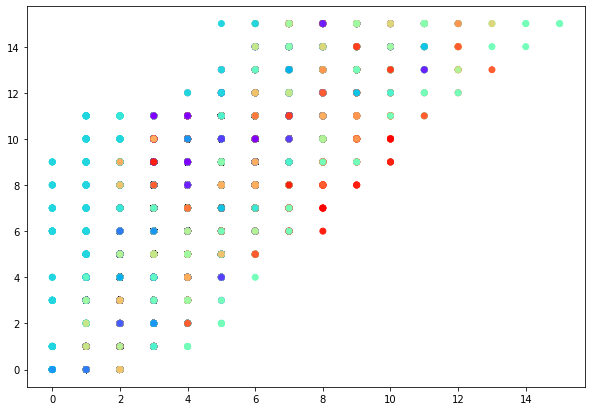

In [136]:
plt.figure(figsize=(10, 7))

plt.scatter(myletter.iloc[:,1], myletter.iloc[:,2], cmap='rainbow', c= colores )

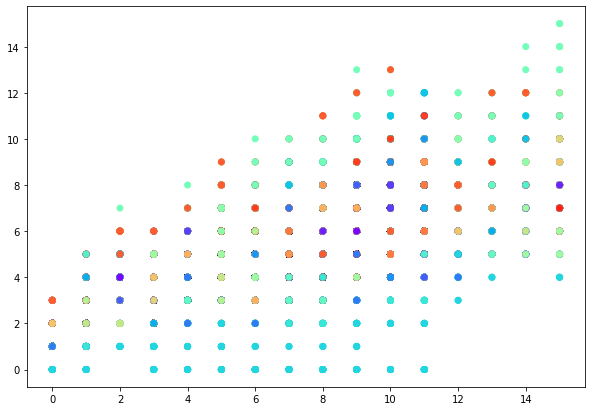

In [137]:
plt.figure(figsize=(10, 7))

plt.scatter(myletter.iloc[:,2], myletter.iloc[:,3], cmap='rainbow', c= colores )

In [163]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=50)
clusterer.fit(myletter.drop(columns =["lettr"]))

HDBSCAN(min_cluster_size=50)

In [164]:
pd.crosstab(clusterer.labels_, columns='count')

col_0,count
row_0,
-1,10268
0,140
1,61
2,57
3,96
4,79
5,112
6,185
7,168


In [166]:
results = pd.concat( [  myletter.iloc[:,0], pd.DataFrame(clusterer.labels_)] , axis=1 )  ## columns= ["Letter","Label"]
results.columns= ["Letter","Label"]
results.head(n=20)

,Letter,Label
0,T,9
1,I,-1
2,D,9
3,N,-1
4,G,9
5,S,-1
6,B,-1
7,A,8
8,J,9
9,M,-1


In [170]:
results.groupby(["Label", "Letter"]).count()[1:60]

Empty DataFrame
Columns: []
Index: [(-1, B), (-1, C), (-1, D), (-1, E), (-1, F), (-1, G), (-1, H), (-1, I), (-1, J), (-1, K), (-1, L), (-1, M), (-1, N), (-1, O), (-1, P), (-1, Q), (-1, R), (-1, S), (-1, T), (-1, U), (-1, V), (-1, W), (-1, X), (-1, Y)]